In [1]:
# standard python imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy

# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [2]:
data = np.load('exp_io_data\CoupledPendula_mean_in7_out7_Tmax1.0_data.npz')
for key, val in data.items():
    print(key)
    exec(key +'=val')

xlist
exp_out_list


In [3]:
x=xlist
y=exp_out_list
#print(y)

In [4]:
x_in=x[:,0:7]
x_para=x[:,7:14]
print(x_in)
print(x_para)

[[0.24749702 0.02014035 0.8485794  ... 0.08696669 0.99749106 0.38496768]
 [0.75097805 0.60711515 0.67705935 ... 0.44351715 0.26912165 0.6546309 ]
 [0.5515969  0.85570264 0.12367398 ... 0.65876925 0.5144654  0.21687716]
 ...
 [0.42885804 0.77784693 0.23516494 ... 0.04689354 0.62893504 0.55456245]
 [0.20224023 0.34561175 0.6055104  ... 0.47257882 0.73187715 0.20602894]
 [0.8430058  0.8306561  0.3663333  ... 0.44167274 0.54337865 0.5084354 ]]
[[0.88139296 0.7579072  0.70741415 ... 0.20202214 0.9071052  0.7719516 ]
 [0.79979634 0.67036146 0.34607875 ... 0.4598763  0.6044103  0.8825798 ]
 [0.80389327 0.94342834 0.01652193 ... 0.74545115 0.7731646  0.6300963 ]
 ...
 [0.22442555 0.8744122  0.07718152 ... 0.7652486  0.48310757 0.2971735 ]
 [0.77770346 0.10846525 0.17362505 ... 0.7885187  0.4216227  0.8429448 ]
 [0.06028473 0.8461147  0.1516673  ... 0.3736133  0.5765584  0.7606528 ]]


In [5]:
print(x.shape)
print(y.shape)

(2000, 14)
(2, 30, 2000, 7, 2)


In [6]:
#y1=y[0:1,29:30,:,:,0:1]
print(y.shape)

F=3 #Fth frame
y2=y[0:1,:,0:1000,:,0:1]
y2_np=torch.from_numpy(y2)
y2=torch.transpose(y2_np,1,2)
print(y2.shape)
y3=y2.squeeze(0).squeeze(3)
print(y3.shape)
y_train=y3[:,F:F+1,:]
print(y_train.shape)

(2, 30, 2000, 7, 2)
torch.Size([1, 1000, 30, 7, 1])
torch.Size([1000, 30, 7])
torch.Size([1000, 1, 7])


In [7]:
x_train=x_in[0:1000,:]
x_train2=x[0:1000,:]
print(x_train.shape)
print(x)

(1000, 7)
[[0.24749702 0.02014035 0.8485794  ... 0.20202214 0.9071052  0.7719516 ]
 [0.75097805 0.60711515 0.67705935 ... 0.4598763  0.6044103  0.8825798 ]
 [0.5515969  0.85570264 0.12367398 ... 0.74545115 0.7731646  0.6300963 ]
 ...
 [0.42885804 0.77784693 0.23516494 ... 0.7652486  0.48310757 0.2971735 ]
 [0.20224023 0.34561175 0.6055104  ... 0.7885187  0.4216227  0.8429448 ]
 [0.8430058  0.8306561  0.3663333  ... 0.3736133  0.5765584  0.7606528 ]]


In [ ]:



# class Net(nn.Module):

#     def __init__(self):
#         super(Net, self).__init__()

#         self.layer1 = nn.Linear(14, 14 ,bias=True)
#         self.layer2 = nn.Linear(14, 14,bias=True)
#         self.layer3 = nn.Linear(14, 14,bias=True)
#         #self.layer4 = nn.Linear(14, 14,bias=True)
#         #self.layer5 = nn.Linear(14, 14,bias=True)
#         self.layer4 = nn.Linear(14, 7,bias=True)
#     def forward(self, x,activation="RELU"):
#         # Max pooling over a (2, 2) window
        
#         x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
#         x = x+torch.sigmoid(self.layer1(x))
#         x = x+torch.sigmoid(self.layer2(x))
#         x = x+torch.sigmoid(self.layer3(x))
#         #x = x+torch.sigmoid(self.layer4(x))
#         #x = x+torch.sigmoid(self.layer5(x))
#         x = self.layer4(x)
#         #x = F.relu(self.layer4(x))
#         #x = F.relu(self.layer5(x))
#         #x = torch.sigmoid(self.layer6(x))
#         return x


# net = Net()
# print(net)

In [17]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(14, 14 ,bias=True)
        self.layer2 = nn.Linear(14, 14,bias=True)
        self.layer3 = nn.Linear(14, 14,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(14, 7,bias=True)
    def forward(self, x,activation="RELU"):
        
        if activation=="RELU":
            x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
            x = x+(self.layer1(x))
            x = x+(self.layer2(x))
            x = x+(self.layer3(x))
            #x = x+torch.sigmoid(self.layer4(x))
            #x = x+torch.sigmoid(self.layer5(x))
            x = self.layer4(x)
            #x = F.relu(self.layer4(x))
            #x = F.relu(self.layer5(x))
            #x = torch.sigmoid(self.layer6(x))
        if activation=="SIG":
            x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
            x = x+torch.sigmoid(self.layer1(x))
            x = x+torch.sigmoid(self.layer2(x))
            x = x+torch.sigmoid(self.layer3(x))
            #x = x+torch.sigmoid(self.layer4(x))
            #x = x+torch.sigmoid(self.layer5(x))
            x = self.layer4(x)
            #x = F.relu(self.layer4(x))
            #x = F.relu(self.layer5(x))
            #x = torch.sigmoid(self.layer6(x))            
        return x


net = Net()
print(net)

Net(
  (layer1): Linear(in_features=14, out_features=14, bias=True)
  (layer2): Linear(in_features=14, out_features=14, bias=True)
  (layer3): Linear(in_features=14, out_features=14, bias=True)
  (layer4): Linear(in_features=14, out_features=7, bias=True)
)


In [9]:

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.RNN(14, 14, 3)


    def forward(self, x):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.layer1(x)

        return x


net = Net()
print(net)

Net(
  (layer1): RNN(14, 14, num_layers=3)
)


In [18]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

8
torch.Size([14, 14])


In [19]:
x_data=torch.tensor(x_train2)
input = x_data
out = net(input)
print(out)
print(out.shape)

tensor([[ 0.3651, -0.7147, -0.6157,  ...,  0.5313,  0.3392, -0.1516],
        [ 0.5510, -0.2502, -0.6124,  ...,  0.3650,  0.2544, -0.4103],
        [ 0.1072, -0.4548, -0.7198,  ...,  0.4016,  0.3785, -0.2445],
        ...,
        [ 0.1645, -0.4321, -1.1323,  ...,  0.1803, -0.2962, -0.0778],
        [ 0.4639, -0.3829, -0.9698,  ...,  0.0126, -0.1312, -0.0520],
        [-0.1081, -0.4513, -0.4613,  ...,  0.4895,  0.0241, -0.0825]],
       grad_fn=<AddmmBackward>)
torch.Size([1000, 7])


In [20]:
net.zero_grad()
out.backward(torch.randn(1000,7))


In [21]:
target=y_train
target_new=target.view(1000,7)
print(target_new.shape)
criterion=nn.MSELoss()
loss=criterion(out,target_new)
print(loss)
print(target_new.shape)

torch.Size([1000, 7])
tensor(0.6294, grad_fn=<MseLossBackward>)
torch.Size([1000, 7])


In [22]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.01, betas=(0.9, 0.999), eps=1e-09, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)


tensor(0.6294, grad_fn=<MseLossBackward>)
tensor(0.5151, grad_fn=<MseLossBackward>)
tensor(0.4745, grad_fn=<MseLossBackward>)
tensor(0.4508, grad_fn=<MseLossBackward>)
tensor(0.4307, grad_fn=<MseLossBackward>)
tensor(0.4129, grad_fn=<MseLossBackward>)
tensor(0.3981, grad_fn=<MseLossBackward>)
tensor(0.3871, grad_fn=<MseLossBackward>)
tensor(0.3794, grad_fn=<MseLossBackward>)
tensor(0.3736, grad_fn=<MseLossBackward>)
tensor(0.3686, grad_fn=<MseLossBackward>)
tensor(0.3640, grad_fn=<MseLossBackward>)
tensor(0.3596, grad_fn=<MseLossBackward>)
tensor(0.3555, grad_fn=<MseLossBackward>)
tensor(0.3519, grad_fn=<MseLossBackward>)
tensor(0.3488, grad_fn=<MseLossBackward>)
tensor(0.3461, grad_fn=<MseLossBackward>)
tensor(0.3434, grad_fn=<MseLossBackward>)
tensor(0.3406, grad_fn=<MseLossBackward>)
tensor(0.3375, grad_fn=<MseLossBackward>)
tensor(0.3342, grad_fn=<MseLossBackward>)
tensor(0.3308, grad_fn=<MseLossBackward>)
tensor(0.3273, grad_fn=<MseLossBackward>)
tensor(0.3239, grad_fn=<MseLossBac

In [23]:
x_test=x[1000:2000,:]
print(x_test.shape)
y1=y[0:1,:,1000:2000,:,0:1]
#(Nrepeat, Ntimesteps, Nx, output_dim, 2)  <-- 2 = (final position, final velocity)
y1_np=torch.from_numpy(y1)
y1=torch.transpose(y1_np,1,2)

(1000, 14)


In [24]:
y1=y[0:1,:,1000:2000,:,0:1]
y1_np=torch.from_numpy(y1)
y1=torch.transpose(y1_np,1,2)
y4=y1.squeeze(0).squeeze(3)
print(y4.shape)

y_test=y4[:,3:3+1,:]
print(y_test.shape)
y_test_new=torch.transpose(y_test,1,2).squeeze(2)

torch.Size([1000, 30, 7])
torch.Size([1000, 1, 7])


In [25]:
x_test=torch.tensor(x[1000:2000,:])
x_para_test=torch.from_numpy(x_para[1000:2000,:])
print(x_test)


tensor([[0.9185, 0.8238, 0.9963,  ..., 0.6682, 0.7984, 0.1572],
        [0.3933, 0.9606, 0.9643,  ..., 0.7520, 0.4876, 0.8830],
        [0.6237, 0.5434, 0.0358,  ..., 0.9932, 0.3677, 0.0729],
        ...,
        [0.4289, 0.7778, 0.2352,  ..., 0.7652, 0.4831, 0.2972],
        [0.2022, 0.3456, 0.6055,  ..., 0.7885, 0.4216, 0.8429],
        [0.8430, 0.8307, 0.3663,  ..., 0.3736, 0.5766, 0.7607]])


In [30]:
y_test=y4[:,3:4,:]
print(y_test.shape)
y_test_new=torch.transpose(y_test,1,2).squeeze(2)

torch.Size([1000, 1, 7])


In [31]:
# print(x_test.shape)
# print(x_para.shape)
# print(test_out.shape)
# x_para_test=torch.from_numpy(x_para[1000:2000,:])
# print(x_para_test.shape)
# x_test_new=torch.cat((test_out,x_para_test),1)
#print(x_test_new.shape)
for i in range(1):
    test_out=net(x_test)
    x_test=torch.cat((test_out,x_para_test),1)
print(test_out)    

tensor([[ 0.0396,  0.1119,  0.1677,  ..., -0.7441, -1.3529, -0.6710],
        [-0.2917,  0.2180, -0.0766,  ..., -0.9562, -0.2634, -0.3580],
        [-0.1120, -0.4451, -1.0781,  ..., -0.2184,  0.0373, -0.2810],
        ...,
        [-0.1397, -0.1552, -0.7049,  ..., -0.8562, -0.3705, -0.2429],
        [-0.9079, -0.7159, -0.4236,  ..., -0.2442, -0.1107, -0.8122],
        [ 0.0919, -0.0607, -0.4689,  ..., -0.5448, -0.5557, -0.3483]],
       grad_fn=<AddmmBackward>)


Text(0, 0.5, 'y_pred')

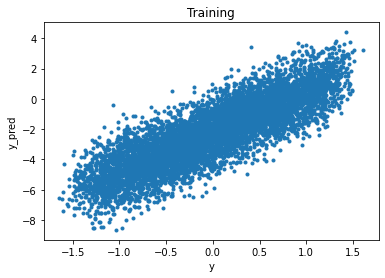

In [32]:
plt.plot(y_test_new.flatten(), 5*test_out.detach().numpy().flatten(), '.')
plt.title('Training')
plt.xlabel('y')
plt.ylabel('y_pred')

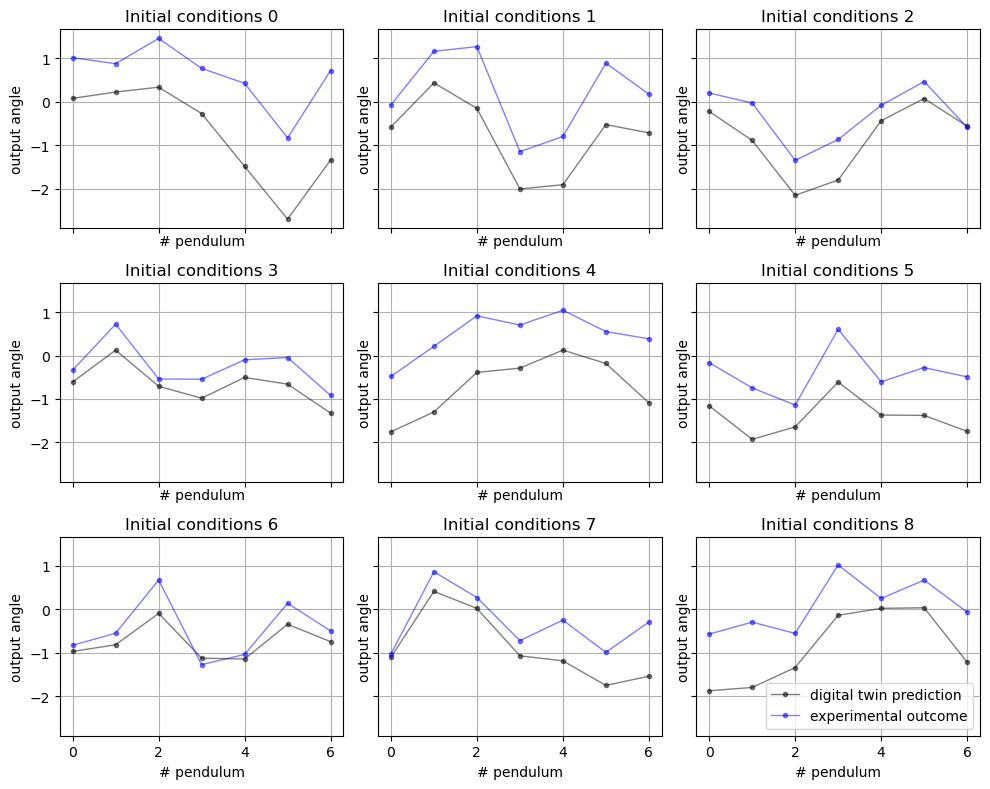

In [33]:
def plot_dt_exp_comparison(yexp, ypred):

    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = [10,8], dpi = 100, sharex=True, sharey=True)
    for i in range(9):
        plt.sca(axs.flatten()[i])
        plt.plot(ypred[i], '.-', lw = 1, c = 'k', alpha = 0.5, label = 'digital twin prediction')
        plt.plot(yexp[i], '.-', lw = 1, c = 'b', alpha = 0.5, label = 'experimental outcome')
        plt.xlabel('# pendulum')
        plt.ylabel('output angle')
        plt.title(f'Initial conditions {i}')
        plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig('img/coupled_pendula_dt_examples.png')
    plt.show()
    
plot_dt_exp_comparison(y_test_new,2*test_out.detach())

In [ ]:

class Net2(nn.Module):

    def __init__(self):
        super(Net2, self).__init__()

        self.layer1 = nn.Linear(14, 120)
        self.layer2 = nn.Linear(120, 120)
        self.layer3 = nn.Linear(120, 120)
        self.layer4 = nn.Linear(120, 84)
        self.layer5 = nn.Linear(84, 42)
        self.layer6 = nn.Linear(42, 7)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.layer1(x))
        x = x+F.relu(self.layer2(x))
        x = x+F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.tanh(self.layer5(x))
        x = F.relu(self.layer6(x))
        return x


net2 = Net2()
print(net2)

params2 = list(net2.parameters())
print(len(params2))
print(params2[0].size())

In [ ]:
x_data=torch.tensor(x)
input = x_data
out = net2(input)
print(out)
print(out.shape)

In [ ]:
target=y1[0:1000,:,:]
target_new=target.view(1000,7)

In [ ]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-06, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net2(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)
